# Location Estimates of Population and Murder Rates

murder rates (in units of murders per 100,000 people per year) per state.

## Find Mean of Population

In [11]:
import pandas as pd

state_df = pd.read_csv("../data/state.csv")

print(state_df["Population"].mean())

6162876.3


## Find Trimmed Mean of Population

In [4]:
from scipy.stats import trim_mean

print(trim_mean(state_df["Population"], proportiontocut=0.1))

4783697.125


## Find Median of Population

In [5]:
print(state_df["Population"].median())

4436369.5


The mean is bigger than the trimmed mean, and the trimmed mean is bigger than the median. This is due to the robustness of the trimmed mean and the median vs the mean.

If we want to compute the average murder rate for the country, we need to use a weighted mean or weighted median because of the differing population of each of the states.

## Find Weighted Mean of Murder Rates

In [7]:
import numpy as np

data = state_df["Murder.Rate"].values

weights = state_df["Population"].values

print(np.average(data, weights=weights))

4.445833981123393


## Find Weighted Median of Murder Rates

In [9]:
import wquantiles
print(wquantiles.median(data, weights))

4.4


In this case weighte mean & weighted median are about the same.


---

# Variability Estimates of State Population

## Find Standard Deviation

In [19]:
print(np.std(state_df["Population"], ddof=1)) # ddof=1 gives us that N-1

6848235.347401142


## Find Interquartile Range (IQR)

In [13]:
print(np.percentile(state_df["Population"], 75) - np.percentile(state_df["Population"], 25))

4847308.0


## Find the median absolute deviation from the median (MAD)

In [22]:
# Method includes the scaling factor of 1.4826, for none normally distributed data you might not want this factor.
print(np.median(np.abs(state_df["Population"] - np.median(state_df["Population"]))) * 1.4826)

3849870.3852



---

# Percentiles and Box Plots

## Find Percentiles based on Quantiles for Murder Rate.

In [24]:
print(state_df["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


The median is 4 murders per 100,000 people.
However, we can see some variability here, 1.6 at the low end (5%) to 6.51 at the high end (95%).

## Create a Boxplot of the population to visualize it's distribution.

Text(0, 0.5, 'Population (million)')

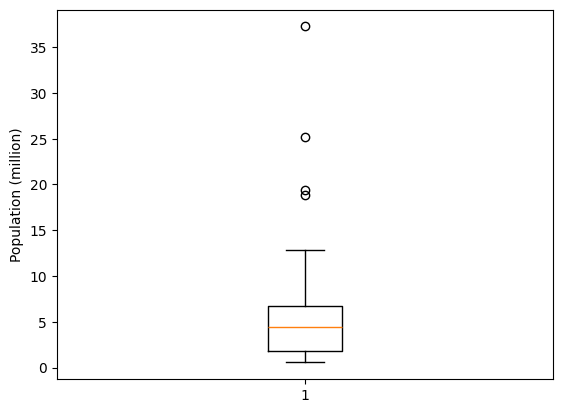

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(state_df["Population"]/1000000)
plt.ylabel("Population (million)")

It looks like most of the places have a population between 2.5 and 7.5 million with a few cases being way higher than that like the outlier that has over 35 million people.

## Create a Histogram of Population

Text(0, 0.5, 'Frequency')

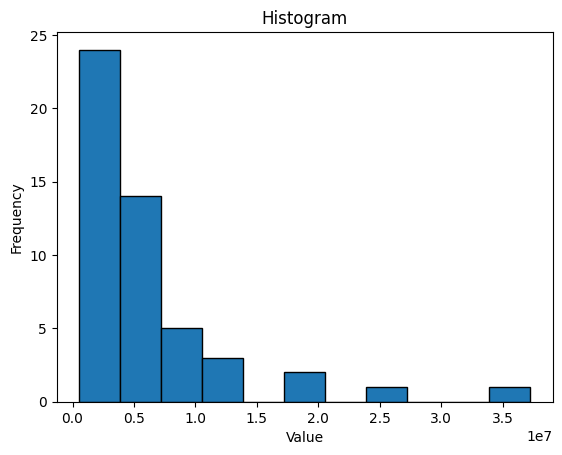

In [34]:
plt.hist(state_df["Population"], bins=11, edgecolor='black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Create a Density Plot of The Murder Rate

/tmp/ipykernel_666398/1791474406.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(state_df["Murder.Rate"], shade=True)


Text(0, 0.5, 'Density')

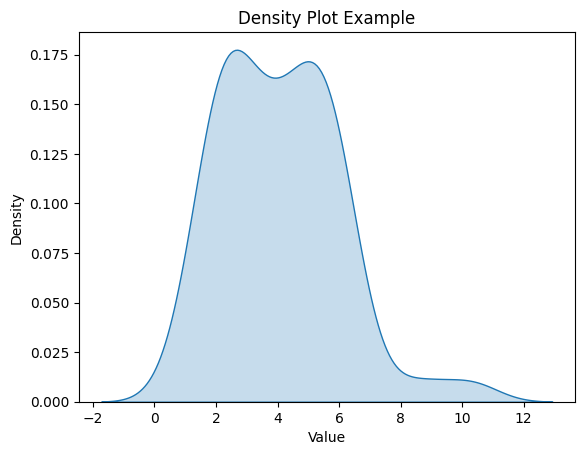

In [41]:
import seaborn as sns

# Create a density plot
sns.kdeplot(state_df["Murder.Rate"], shade=True)

# Add labels and title
plt.title("Density Plot Example")
plt.xlabel("Value")
plt.ylabel("Density")